<a href="https://colab.research.google.com/github/azkalarissa/spotify-eda/blob/main/Spotify_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Module

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import json
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import seaborn as sns
from pandas.api.types import CategoricalDtype

In [ ]:
!cp /content/drive/MyDrive/SpotifyEDA/spotistat.py Scripts as Modules/spotistat.py /content

cp: cannot stat 'Scripts': No such file or directory
cp: cannot stat 'as': No such file or directory
cp: cannot stat 'Modules/spotistat.py': No such file or directory


In [ ]:
import spotistat

In [ ]:
spotistat

<module 'spotistat' from '/content/spotistat.py'>

# Preprocessing Data
by shandytp https://github.com/shandytp/eda-spotify-personal-data/blob/main/utils/preprocess_data.py

In [ ]:
def decode_JSON(data_path, encode='utf-8'):
    return json.load(open(data_path, encoding=encode))

def filterByArtist(df_name, artist_name):
    return df_name[df_name['artist'] == artist_name]

def track_count(df_name):
    return df_name.groupby(['artist', 'album']).count()

# Importing Data

In [ ]:
df0 = pd.read_json("/content/drive/MyDrive/SpotifyEDA/StreamingHistory0.json")
df1 = pd.read_json("/content/drive/MyDrive/SpotifyEDA/StreamingHistory1.json")
df2 = pd.read_json("/content/drive/MyDrive/SpotifyEDA/StreamingHistory2.json")
df3 = pd.read_json("/content/drive/MyDrive/SpotifyEDA/StreamingHistory3.json")
df4 = pd.read_json("/content/drive/MyDrive/SpotifyEDA/StreamingHistory4.json")
df5 = pd.read_json("/content/drive/MyDrive/SpotifyEDA/StreamingHistory5.json")

In [ ]:
# Merge Multiple Dataframes
dfm1 = pd.merge(df0, df1, how = 'outer')
dfm2 = pd.merge(dfm1, df2, how = 'outer')
dfm3 = pd.merge(dfm2, df3, how = 'outer')
dfm4 = pd.merge(dfm3, df4, how = 'outer')
df = pd.merge(dfm4, df5, how = 'outer')

In [ ]:
df.count()

endTime       51696
artistName    51696
trackName     51696
msPlayed      51696
dtype: int64

# Defining Functions

In [ ]:
# Total Unique Artist
def totalUniqueArtist(df_name):
    np.sort(df_name['artistName'].unique())
    print(f"Total Unique Artist : {df_name['artistName'].nunique()} Artists")

In [ ]:
# Total Unique Track
def totalUniqueTrack(df):
  np.sort(df['trackName'].unique())
  print(f"Total Unique Track : {df['trackName'].nunique()} Tracks")

In [ ]:
# Total Streams
def totalStreams(df):
  minsPlayed = (df['msPlayed'].sum())/(1000*60)
  print(f"Total Minutes Stream : {minsPlayed} minutes")

In [ ]:
# Determine top n artists
def topNartists(df, top, plot=True):
    print(f'Top {top} Artists')
    df_topN = df.groupby('artistName', as_index=False) \
        .agg({'endTime':'count', 'msPlayed':'sum'}) \
        .rename(columns={'endTime':'noStreams', 'msPlayed':'streamTimeMs'})
    df_topN['streamTimeHr'] = df_topN['streamTimeMs']/(1000*60*60)
    df_topN = df_topN.sort_values(by=['noStreams'], ascending=False)
    df_topN = df_topN.head(top)
    df_topN = df_topN.drop('streamTimeMs', axis=1)

    #Visualization
    plt.figure(figsize=(10,7))
    sns.barplot(df_topN['artistName'], df_topN['noStreams'], alpha=0.3)
    # plt.stem(artist, noStreams)
    plt.title(f'Top {top} Artists in May 2021 -May 2022')
    plt.ylabel('Number of Streams', fontsize=12)
    plt.xticks(rotation=90)
    plt.xlabel('Artist', fontsize=12)
    plt.show()

    print(df_topN)
    return df_topN

In [ ]:
# Determine top n tracks
def topNtracks(df, n, plot=True):
    print('Top ' + str(n) + ' Tracks')
    df_topN = df.groupby(['trackName', 'artistName'], as_index=False) \
        .agg({'endTime':'count', 'msPlayed':'sum'}) \
        .rename(columns={'endTime':'noStreams', 'msPlayed':'streamTimeMs'})
    df_topN['streamTimeHr'] = df_topN['streamTimeMs']/(1000*60*60)
    df_topN = df_topN.sort_values(by=['noStreams'], ascending=False)
    df_topN = df_topN.head(n)
    df_topN = df_topN.drop('streamTimeMs', axis=1)

    return df_topN

# Exploratory Data Analysis (May 14, 2021 - May 15, 2022)

In [ ]:
totalUniqueTrack(df)

Total Unique Track : 11649 Tracks


In [ ]:
totalStreams(df)

Total Minutes Stream : 176119.8362 minutes


That's... such an insane number of streams I know, but the result is actually similiar to my 2021 Spotify Wrapped which was **(lupa berapa)**

Top 10 Artists


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


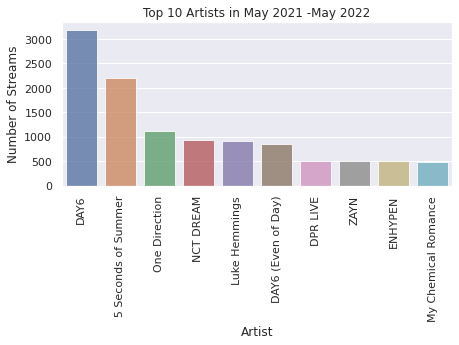

               artistName  noStreams  streamTimeHr
716                  DAY6       3181    183.391989
25    5 Seconds of Summer       2199    116.348340
2307        One Direction       1122     59.492659
2167            NCT DREAM        934     52.976561
1911        Luke Hemmings        905     54.742433
717    DAY6 (Even of Day)        848     48.771435
734              DPR LIVE        496     27.996234
3640                 ZAYN        496     26.893714
897               ENHYPEN        495     23.272319
2158  My Chemical Romance        476     28.414035


,artistName,noStreams,streamTimeHr
716,DAY6,3181,183.391989
25,5 Seconds of Summer,2199,116.348340
2307,One Direction,1122,59.492659
2167,NCT DREAM,934,52.976561
1911,Luke Hemmings,905,54.742433
717,DAY6 (Even of Day),848,48.771435
734,DPR LIVE,496,27.996234
3640,ZAYN,496,26.893714
897,ENHYPEN,495,23.272319
2158,My Chemical Romance,476,28.414035


In [ ]:
topNartists(df, 10)

In [ ]:
topNtracks(df, 10)

Top 10 Tracks


,trackName,artistName,noStreams,streamTimeHr
9411,Starting Line,Luke Hemmings,201,14.314308
6837,Motion,Luke Hemmings,163,9.237279
8330,Right Through Me,DAY6 (Even of Day),154,8.624319
2912,EVERYTHING,The Black Skirts,146,11.206119
8912,She's In The Rain,The Rose,124,7.561251
3542,Forget Me Not,ENHYPEN,123,6.633551
2615,Dive Into You,NCT DREAM,117,6.312003
12655,예뻤어 You Were Beautiful,DAY6,115,8.275021
3726,Ghost Of You,5 Seconds of Summer,113,5.733141
2616,Dive with you (feat. eaJ),Seori,110,6.506593


In [ ]:
# Filter by Artist
def filterByArtist(artist):
  filter = df[df['artistName'] == artist]
  filter = filter.groupby(['trackName']).agg({'endTime':'count','msPlayed':'sum'}).rename(columns={'endTime':'noStreams', 'msPlayed':'streamTimeMs'})
  filter['streamTimeHr'] = filter['streamTimeMs']/(1000*60*60)
  filter = filter.sort_values(by=['noStreams'], ascending=False)
  filter = filter.drop('streamTimeMs', axis=1)
  return filter

In [ ]:
filterByArtist('P1Harmony')

,noStreams,streamTimeHr
trackName,,
If You Call Me,65,3.731997
Before The Dawn,13,0.902946
Scared,9,0.405686
That’s It,7,0.341417
SIREN,7,0.337797
Butterfly,7,0.389562
Reset,6,0.326533
Pyramid,4,0.244784
Nemonade,4,0.223077


In [ ]:
# Count how many times a track being streamed
def noStreamsTrack(track, artist):
  track = df[df['trackName'] == track]
  artist = df[df['artistName'] == artist]
  return [track['trackName'].count()]

In [ ]:
noStreamsTrack('Right Now', 'One Direction')

[14]

## Explore 2022 Data

In [ ]:
# Read Data
df_22 = df[df['endTime'] >= '2022-01-01']
df_22.head()

,endTime,artistName,trackName,msPlayed
42900,2022-01-01 19:04:00,Rex Orange County,Pluto Projector,266054
42901,2022-01-01 19:08:00,Cigarettes After Sex,Apocalypse,191482
42902,2022-01-02 05:56:00,Patrick Watson,Je te laisserai des mots,287893
42903,2022-01-02 05:59:00,Ryan Gosling,"City Of Stars - From ""La La Land"" Soundtrack",149706
42904,2022-01-02 06:03:00,Coldplay,Sparks,227093


In [ ]:
totalUniqueTrack(df_22)
totalUniqueArtist(df_22)

Total Unique Track : 3910 Tracks
Total Unique Artist : 1598 Artists


In [ ]:
topNtracks(df_22, 30)

Top 30 Tracks


,trackName,artistName,noStreams,streamTimeHr
1094,Forget Me Not,ENHYPEN,122,6.576914
531,COMPLETE MESS,5 Seconds of Summer,71,3.697152
260,As It Was,Harry Styles,46,2.142967
3128,Take My Hand,5 Seconds of Summer,31,1.782564
2493,Polaroid Love,ENHYPEN,31,1.593372
2631,Right Through Me,DAY6 (Even of Day),30,1.598845
429,Blessed-Cursed,ENHYPEN,29,1.382581
568,Car Crash,eaJ,27,1.400650
108,A journey,WONPIL,26,1.461183
815,Dive with you (feat. eaJ),Seori,26,1.429588


Top 20 Artists


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


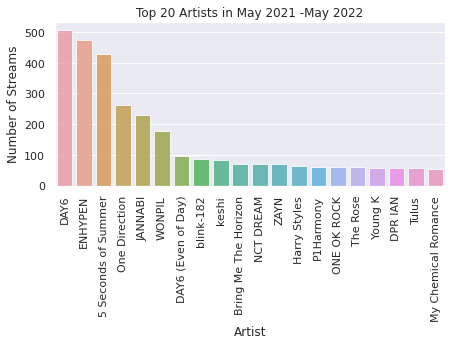

                artistName  noStreams  streamTimeHr
310                   DAY6        506     24.930553
370                ENHYPEN        474     22.238627
11     5 Seconds of Summer        430     22.933303
951          One Direction        262     13.702940
587                JANNABI        229     12.369112
1437                WONPIL        177     10.390976
311     DAY6 (Even of Day)         96      5.182079
1525             blink-182         87      4.694708
1563                 keshi         82      3.977674
200   Bring Me The Horizon         70      4.305151
890              NCT DREAM         70      3.728581
1509                  ZAYN         70      3.555665
529           Harry Styles         63      2.871816
962              P1Harmony         61      3.494402
937            ONE OK ROCK         61      3.708954
1344              The Rose         60      3.160400
1500               Young K         56      3.142746
321                DPR IAN         56      2.912233
1399        

,artistName,noStreams,streamTimeHr
310,DAY6,506,24.930553
370,ENHYPEN,474,22.238627
11,5 Seconds of Summer,430,22.933303
951,One Direction,262,13.702940
587,JANNABI,229,12.369112
1437,WONPIL,177,10.390976
311,DAY6 (Even of Day),96,5.182079
1525,blink-182,87,4.694708
1563,keshi,82,3.977674
200,Bring Me The Horizon,70,4.305151


In [ ]:
topNartists(df_22, 20)

## Top 10

Top Artists
               artistName  noStreams  streamTimeMs  streamTimeHr
286                  DAY6       1054     223885880     62.190522
14    5 Seconds of Summer        525      97165857     26.990516
852             NCT DREAM        412      82686456     22.968460
910         One Direction        177      32737749      9.093819
115              BAEKHYUN        143      30466050      8.462792
846   My Chemical Romance        128      25728968      7.146936
1051            SEVENTEEN        127      23390422      6.497339
1296             The Rose        109      21918433      6.088454
850               NCT 127        108      22472295      6.242304
1159           Stray Kids        107      20227145      5.618651


,artistName,noStreams,streamTimeMs,streamTimeHr
286,DAY6,1054,223885880,62.190522
14,5 Seconds of Summer,525,97165857,26.990516
852,NCT DREAM,412,82686456,22.968460
910,One Direction,177,32737749,9.093819
115,BAEKHYUN,143,30466050,8.462792
846,My Chemical Romance,128,25728968,7.146936
1051,SEVENTEEN,127,23390422,6.497339
1296,The Rose,109,21918433,6.088454
850,NCT 127,108,22472295,6.242304
1159,Stray Kids,107,20227145,5.618651


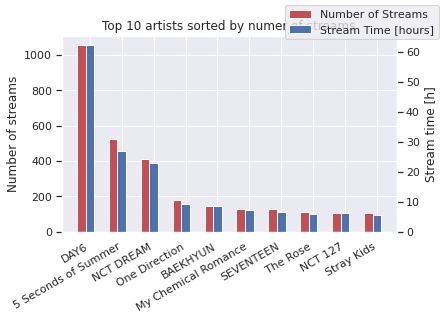

In [ ]:
spotistat.top10artists(df0)

Top Tracks
                       trackName           artistName  noStreams  \
9411               Starting Line        Luke Hemmings        201   
6837                      Motion        Luke Hemmings        163   
8330            Right Through Me   DAY6 (Even of Day)        154   
2912                  EVERYTHING     The Black Skirts        146   
8912           She's In The Rain             The Rose        124   
3542               Forget Me Not              ENHYPEN        123   
2615               Dive Into You            NCT DREAM        117   
12655     예뻤어 You Were Beautiful                 DAY6        115   
3726                Ghost Of You  5 Seconds of Summer        113   
2616   Dive with you (feat. eaJ)                Seori        110   

       streamTimeMs  streamTimeHr                               fullName  
9411       51531508     14.314308          Luke Hemmings - Starting Line  
6837       33254206      9.237279                 Luke Hemmings - Motion  
8330       3104

,trackName,artistName,noStreams,streamTimeMs,streamTimeHr,fullName
9411,Starting Line,Luke Hemmings,201,51531508,14.314308,Luke Hemmings - Starting Line
6837,Motion,Luke Hemmings,163,33254206,9.237279,Luke Hemmings - Motion
8330,Right Through Me,DAY6 (Even of Day),154,31047548,8.624319,DAY6 (Even of Day) - Right Through Me
2912,EVERYTHING,The Black Skirts,146,40342027,11.206119,The Black Skirts - EVERYTHING
8912,She's In The Rain,The Rose,124,27220505,7.561251,The Rose - She's In The Rain
3542,Forget Me Not,ENHYPEN,123,23880784,6.633551,ENHYPEN - Forget Me Not
2615,Dive Into You,NCT DREAM,117,22723209,6.312003,NCT DREAM - Dive Into You
12655,예뻤어 You Were Beautiful,DAY6,115,29790076,8.275021,DAY6 - 예뻤어 You Were Beautiful
3726,Ghost Of You,5 Seconds of Summer,113,20639308,5.733141,5 Seconds of Summer - Ghost Of You
2616,Dive with you (feat. eaJ),Seori,110,23423733,6.506593,Seori - Dive with you (feat. eaJ)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48868 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text

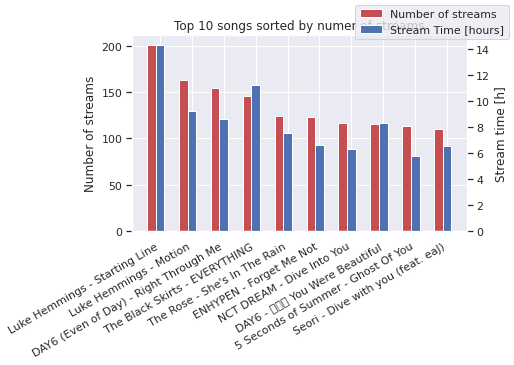

In [ ]:
spotistat.top10tracks(df)

## load over time & avg day load

In [ ]:
spotistat.load_over_time(df)

,endTime,msPlayed,hrPlayed
0,2020-07-29,92190,0.025608
1,2021-05-14,90347,0.025096
2,2021-05-15,55505215,15.418115
3,2021-05-16,27630513,7.675142
4,2021-05-17,50247089,13.957525
...,...,...,...
357,2022-05-11,6803756,1.889932
358,2022-05-12,10845692,3.012692
359,2022-05-13,14312145,3.975596
360,2022-05-14,3656813,1.015781


           dayCount  noStreams    msPlayed    hrPlayed  hrPlayedAvg  \
weekday                                                               
Monday           93       7786  1599889939  444.413872     4.778644   
Tuesday          93       7622  1572899830  436.916619     4.698028   
Wednesday        94       7745  1612858946  448.016374     4.766132   
Thursday         94       8209  1628286517  452.301810     4.811721   
Friday           94       7589  1558379244  432.883123     4.605140   
Saturday         94       5503  1125652284  312.681190     3.326396   
Sunday           94       7242  1469223412  408.117614     4.341677   

           noStreamsAvg  lenStreamsAvgMin  
weekday                                    
Monday        83.720430          3.424715  
Tuesday       81.956989          3.439386  
Wednesday     82.393617          3.470753  
Thursday      87.329787          3.305897  
Friday        80.734043          3.422452  
Saturday      58.542553          3.409208  
Sunday  

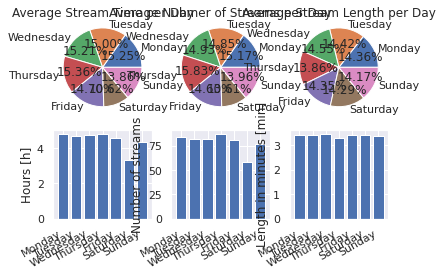

In [ ]:
spotistat.avg_day_load(df)

## Exploring top 10 tracks & artists each dfs

Top Tracks
              trackName artistName  noStreams  streamTimeMs  streamTimeHr  \
857       Dive Into You  NCT DREAM         50       9984987      2.773607   
2223           My Youth  NCT DREAM         41       9096005      2.526668   
2588            Rainbow  NCT DREAM         38       8703009      2.417502   
2383               Only       DAY6         36       8560882      2.378023   
3950      so let’s love       DAY6         35       7418269      2.060630   
3715        You make Me       DAY6         35       7434205      2.065057   
2826  She's In The Rain   The Rose         32       7386888      2.051913   
1681      Irreplaceable  NCT DREAM         30       6181455      1.717071   
1348             Healer       DAY6         29       6588365      1.830101   
348               Bambi   BAEKHYUN         29       5852661      1.625739   

                          fullName  
857      NCT DREAM - Dive Into You  
2223          NCT DREAM - My Youth  
2588           NCT DREAM - Rai

,trackName,artistName,noStreams,streamTimeMs,streamTimeHr,fullName
857,Dive Into You,NCT DREAM,50,9984987,2.773607,NCT DREAM - Dive Into You
2223,My Youth,NCT DREAM,41,9096005,2.526668,NCT DREAM - My Youth
2588,Rainbow,NCT DREAM,38,8703009,2.417502,NCT DREAM - Rainbow
2383,Only,DAY6,36,8560882,2.378023,DAY6 - Only
3950,so let’s love,DAY6,35,7418269,2.060630,DAY6 - so let’s love
3715,You make Me,DAY6,35,7434205,2.065057,DAY6 - You make Me
2826,She's In The Rain,The Rose,32,7386888,2.051913,The Rose - She's In The Rain
1681,Irreplaceable,NCT DREAM,30,6181455,1.717071,NCT DREAM - Irreplaceable
1348,Healer,DAY6,29,6588365,1.830101,DAY6 - Healer
348,Bambi,BAEKHYUN,29,5852661,1.625739,BAEKHYUN - Bambi


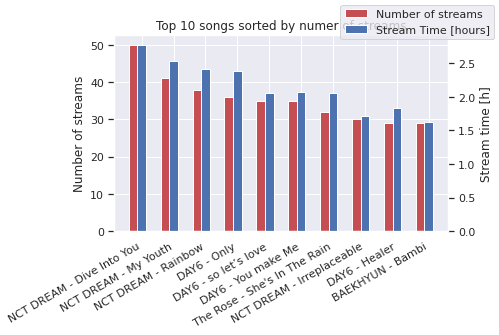

In [ ]:
spotistat.top10tracks(df0)

Top Artists
               artistName  noStreams  streamTimeMs  streamTimeHr
268                  DAY6        618     130929665     36.369351
17    5 Seconds of Summer        454      83381674     23.161576
849         One Direction        433      83025931     23.062759
269    DAY6 (Even of Day)        417      86055767     23.904380
787             NCT DREAM        248      52025476     14.451521
689         Luke Hemmings        208      46951694     13.042137
780   My Chemical Romance        141      30396289      8.443414
1011                 SURL        141      32566634      9.046287
1393                 ZAYN        128      24552278      6.820077
965          Reality Club        104      22497430      6.249286


,artistName,noStreams,streamTimeMs,streamTimeHr
268,DAY6,618,130929665,36.369351
17,5 Seconds of Summer,454,83381674,23.161576
849,One Direction,433,83025931,23.062759
269,DAY6 (Even of Day),417,86055767,23.904380
787,NCT DREAM,248,52025476,14.451521
689,Luke Hemmings,208,46951694,13.042137
780,My Chemical Romance,141,30396289,8.443414
1011,SURL,141,32566634,9.046287
1393,ZAYN,128,24552278,6.820077
965,Reality Club,104,22497430,6.249286


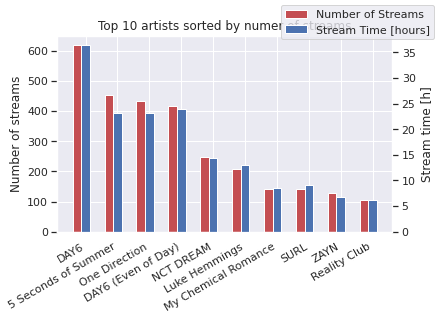

In [ ]:
spotistat.top10artists(df1)

Top Tracks
                         trackName          artistName  noStreams  \
2787                 Starting Line       Luke Hemmings        104   
1994                        Motion       Luke Hemmings         99   
2458              Right Through Me  DAY6 (Even of Day)         67   
1670                   LOVE PARADE  DAY6 (Even of Day)         53   
851                     EVERYTHING    The Black Skirts         52   
3267                            WE  DAY6 (Even of Day)         50   
3611  from the ending of a tragedy  DAY6 (Even of Day)         50   
3543     all the things you wanted  DAY6 (Even of Day)         50   
3264                          WALK  DAY6 (Even of Day)         49   
1305                    Home Alone  DAY6 (Even of Day)         49   

      streamTimeMs  streamTimeHr  \
2787      25975429      7.215397   
1994      20039050      5.566403   
2458      13654212      3.792837   
1670      11574117      3.215032   
851       13773245      3.825901   
3267      112

,trackName,artistName,noStreams,streamTimeMs,streamTimeHr,fullName
2787,Starting Line,Luke Hemmings,104,25975429,7.215397,Luke Hemmings - Starting Line
1994,Motion,Luke Hemmings,99,20039050,5.566403,Luke Hemmings - Motion
2458,Right Through Me,DAY6 (Even of Day),67,13654212,3.792837,DAY6 (Even of Day) - Right Through Me
1670,LOVE PARADE,DAY6 (Even of Day),53,11574117,3.215032,DAY6 (Even of Day) - LOVE PARADE
851,EVERYTHING,The Black Skirts,52,13773245,3.825901,The Black Skirts - EVERYTHING
3267,WE,DAY6 (Even of Day),50,11253276,3.125910,DAY6 (Even of Day) - WE
3611,from the ending of a tragedy,DAY6 (Even of Day),50,9501205,2.639224,DAY6 (Even of Day) - from the ending of a tragedy
3543,all the things you wanted,DAY6 (Even of Day),50,9673683,2.687134,DAY6 (Even of Day) - all the things you wanted
3264,WALK,DAY6 (Even of Day),49,10730949,2.980819,DAY6 (Even of Day) - WALK
1305,Home Alone,DAY6 (Even of Day),49,9636858,2.676905,DAY6 (Even of Day) - Home Alone


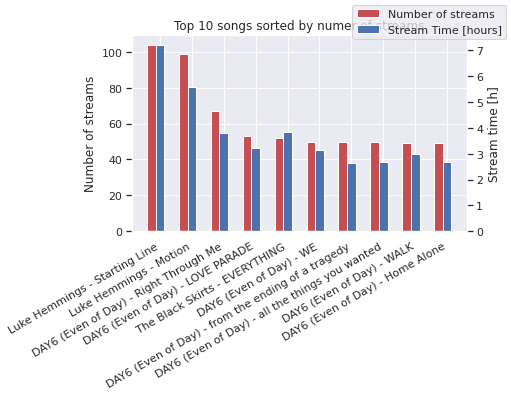

In [ ]:
spotistat.top10tracks(df1)

Top Artists
               artistName  noStreams  streamTimeMs  streamTimeHr
747         Luke Hemmings        493     105352713     29.264643
279                  DAY6        375      80926815     22.479671
14    5 Seconds of Summer        373      74924058     20.812238
291              DPR LIVE        163      33450516      9.291810
854               NCT 127        140      29463521      8.184311
1186           Stray Kids        138      26693222      7.414784
952              Paramore        136      30180012      8.383337
1473              Young K        136      26458010      7.349447
280    DAY6 (Even of Day)        126      27335281      7.593134
1482                 ZAYN        118      24226970      6.729714


,artistName,noStreams,streamTimeMs,streamTimeHr
747,Luke Hemmings,493,105352713,29.264643
279,DAY6,375,80926815,22.479671
14,5 Seconds of Summer,373,74924058,20.812238
291,DPR LIVE,163,33450516,9.291810
854,NCT 127,140,29463521,8.184311
1186,Stray Kids,138,26693222,7.414784
952,Paramore,136,30180012,8.383337
1473,Young K,136,26458010,7.349447
280,DAY6 (Even of Day),126,27335281,7.593134
1482,ZAYN,118,24226970,6.729714


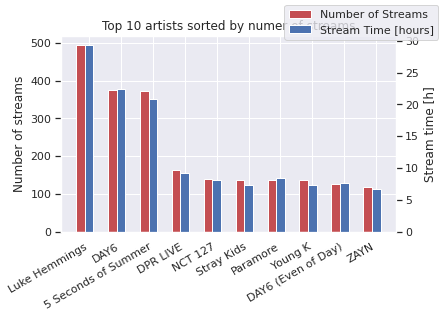

In [ ]:
spotistat.top10artists(df2)

Top Tracks
              trackName     artistName  noStreams  streamTimeMs  streamTimeHr  \
2901      Starting Line  Luke Hemmings         55      14381579      3.994883   
2097             Motion  Luke Hemmings         50      10281092      2.855859   
273           Baby Blue  Luke Hemmings         43       9382979      2.606383   
2656             Saigon  Luke Hemmings         42       8753677      2.431577   
2423        Place In Me  Luke Hemmings         41       7466375      2.073993   
2107                Mum  Luke Hemmings         40       8555211      2.376447   
391           Bloodline  Luke Hemmings         39       4701749      1.306041   
772            Diamonds  Luke Hemmings         38       9046925      2.513035   
67    A Beautiful Dream  Luke Hemmings         38       7001650      1.944903   
2807          Slip Away  Luke Hemmings         38       8816758      2.449099   

                               fullName  
2901      Luke Hemmings - Starting Line  
2097         

,trackName,artistName,noStreams,streamTimeMs,streamTimeHr,fullName
2901,Starting Line,Luke Hemmings,55,14381579,3.994883,Luke Hemmings - Starting Line
2097,Motion,Luke Hemmings,50,10281092,2.855859,Luke Hemmings - Motion
273,Baby Blue,Luke Hemmings,43,9382979,2.606383,Luke Hemmings - Baby Blue
2656,Saigon,Luke Hemmings,42,8753677,2.431577,Luke Hemmings - Saigon
2423,Place In Me,Luke Hemmings,41,7466375,2.073993,Luke Hemmings - Place In Me
2107,Mum,Luke Hemmings,40,8555211,2.376447,Luke Hemmings - Mum
391,Bloodline,Luke Hemmings,39,4701749,1.306041,Luke Hemmings - Bloodline
772,Diamonds,Luke Hemmings,38,9046925,2.513035,Luke Hemmings - Diamonds
67,A Beautiful Dream,Luke Hemmings,38,7001650,1.944903,Luke Hemmings - A Beautiful Dream
2807,Slip Away,Luke Hemmings,38,8816758,2.449099,Luke Hemmings - Slip Away


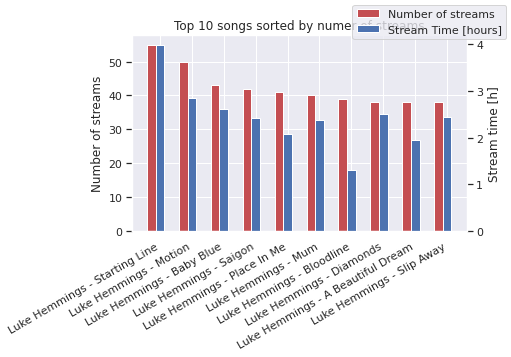

In [ ]:
spotistat.top10tracks(df2)

Top Artists
               artistName  noStreams  streamTimeMs  streamTimeHr
306                  DAY6        512     109863625     30.517674
12    5 Seconds of Summer        329      63629074     17.674743
1064                Queen        278      63259371     17.572048
320              DPR LIVE        177      34750231      9.652842
978         One Direction        127      24892425      6.914562
307    DAY6 (Even of Day)        114      23958776      6.655216
913               NCT 127        109      22521513      6.255976
816         Luke Hemmings        101      21776271      6.048964
1589                 ZAYN         95      18823728      5.228813
1580              Young K         94      19251339      5.347594


,artistName,noStreams,streamTimeMs,streamTimeHr
306,DAY6,512,109863625,30.517674
12,5 Seconds of Summer,329,63629074,17.674743
1064,Queen,278,63259371,17.572048
320,DPR LIVE,177,34750231,9.652842
978,One Direction,127,24892425,6.914562
307,DAY6 (Even of Day),114,23958776,6.655216
913,NCT 127,109,22521513,6.255976
816,Luke Hemmings,101,21776271,6.048964
1589,ZAYN,95,18823728,5.228813
1580,Young K,94,19251339,5.347594


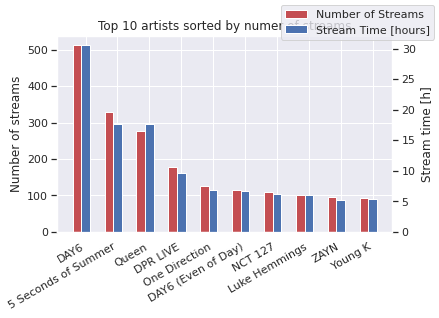

In [ ]:
spotistat.top10artists(df3)

Top Tracks
                      trackName           artistName  noStreams  streamTimeMs  \
1578            Happy Death Day       Xdinary Heroes         37       7934651   
1020  Dive with you (feat. eaJ)                Seori         35       7638399   
1140                 EVERYTHING     The Black Skirts         30       8509522   
4505       Where the sea sleeps   DAY6 (Even of Day)         29       6831587   
3526          She's In The Rain             The Rose         29       6192951   
5008     예뻤어 You Were Beautiful                 DAY6         28       6792973   
995       Diamonds + And Pearls             DPR LIVE         27       6089026   
2117                    Jasmine             DPR LIVE         24       4433120   
4250                  Try Again              JAEHYUN         24       4277391   
70                         2011  5 Seconds of Summer         24       4450988   

      streamTimeHr                                   fullName  
1578      2.204070           Xdin

,trackName,artistName,noStreams,streamTimeMs,streamTimeHr,fullName
1578,Happy Death Day,Xdinary Heroes,37,7934651,2.204070,Xdinary Heroes - Happy Death Day
1020,Dive with you (feat. eaJ),Seori,35,7638399,2.121777,Seori - Dive with you (feat. eaJ)
1140,EVERYTHING,The Black Skirts,30,8509522,2.363756,The Black Skirts - EVERYTHING
4505,Where the sea sleeps,DAY6 (Even of Day),29,6831587,1.897663,DAY6 (Even of Day) - Where the sea sleeps
3526,She's In The Rain,The Rose,29,6192951,1.720264,The Rose - She's In The Rain
5008,예뻤어 You Were Beautiful,DAY6,28,6792973,1.886937,DAY6 - 예뻤어 You Were Beautiful
995,Diamonds + And Pearls,DPR LIVE,27,6089026,1.691396,DPR LIVE - Diamonds + And Pearls
2117,Jasmine,DPR LIVE,24,4433120,1.231422,DPR LIVE - Jasmine
4250,Try Again,JAEHYUN,24,4277391,1.188164,JAEHYUN - Try Again
70,2011,5 Seconds of Summer,24,4450988,1.236386,5 Seconds of Summer - 2011


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48868 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text

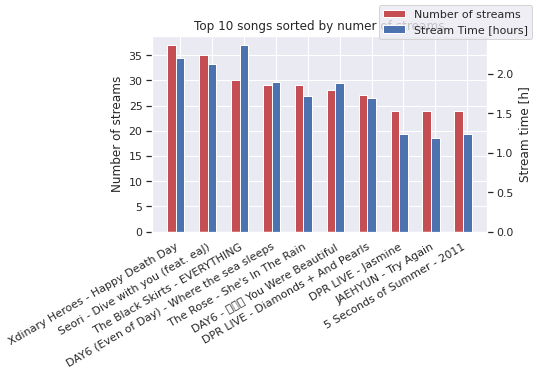

In [ ]:
spotistat.top10tracks(df3)

Top Artists
               artistName  noStreams  streamTimeMs  streamTimeHr
340                  DAY6        591     112211651     31.169903
13    5 Seconds of Summer        430      83075388     23.076497
407               ENHYPEN        419      69990426     19.441785
1047        One Direction        195      36183702     10.051028
651               JANNABI        194      38053462     10.570406
1025  Nothing But Thieves        164      36747371     10.207603
1575               WONPIL        160      33928908      9.424697
341    DAY6 (Even of Day)        133      26489256      7.358127
1476             The Rose         97      19013436      5.281510
877         Luke Hemmings         96      21471645      5.964346


,artistName,noStreams,streamTimeMs,streamTimeHr
340,DAY6,591,112211651,31.169903
13,5 Seconds of Summer,430,83075388,23.076497
407,ENHYPEN,419,69990426,19.441785
1047,One Direction,195,36183702,10.051028
651,JANNABI,194,38053462,10.570406
1025,Nothing But Thieves,164,36747371,10.207603
1575,WONPIL,160,33928908,9.424697
341,DAY6 (Even of Day),133,26489256,7.358127
1476,The Rose,97,19013436,5.281510
877,Luke Hemmings,96,21471645,5.964346


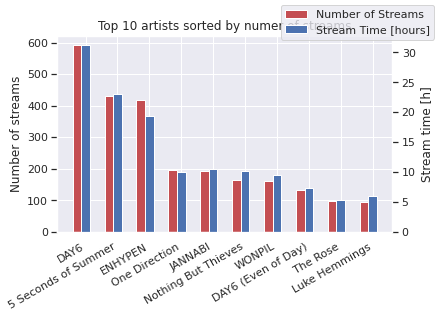

In [ ]:
spotistat.top10artists(df4)

Top Tracks
                           trackName           artistName  noStreams  \
1240                   Forget Me Not              ENHYPEN        106   
1435                 Happy Death Day       Xdinary Heroes         64   
602                    COMPLETE MESS  5 Seconds of Summer         59   
1787                      Impossible  Nothing But Thieves         54   
2992                Right Through Me   DAY6 (Even of Day)         41   
933        Dive with you (feat. eaJ)                Seori         36   
3194               She's In The Rain             The Rose         31   
4322         for lovers who hesitate              JANNABI         31   
4534          예뻤어 You Were Beautiful                 DAY6         30   
3058  STAB (Feat. eaJ) (Prod. dress)          BIG Naughty         29   

      streamTimeMs  streamTimeHr                                      fullName  
1240      20191457      5.608738                       ENHYPEN - Forget Me Not  
1435      13493495      3.748193  

,trackName,artistName,noStreams,streamTimeMs,streamTimeHr,fullName
1240,Forget Me Not,ENHYPEN,106,20191457,5.608738,ENHYPEN - Forget Me Not
1435,Happy Death Day,Xdinary Heroes,64,13493495,3.748193,Xdinary Heroes - Happy Death Day
602,COMPLETE MESS,5 Seconds of Summer,59,11044018,3.067783,5 Seconds of Summer - COMPLETE MESS
1787,Impossible,Nothing But Thieves,54,12678964,3.521934,Nothing But Thieves - Impossible
2992,Right Through Me,DAY6 (Even of Day),41,7990195,2.219499,DAY6 (Even of Day) - Right Through Me
933,Dive with you (feat. eaJ),Seori,36,7332946,2.036929,Seori - Dive with you (feat. eaJ)
3194,She's In The Rain,The Rose,31,6430835,1.786343,The Rose - She's In The Rain
4322,for lovers who hesitate,JANNABI,31,7871546,2.186541,JANNABI - for lovers who hesitate
4534,예뻤어 You Were Beautiful,DAY6,30,7759247,2.155346,DAY6 - 예뻤어 You Were Beautiful
3058,STAB (Feat. eaJ) (Prod. dress),BIG Naughty,29,5205923,1.446090,BIG Naughty - STAB (Feat. eaJ) (Prod. dress)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48868 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text

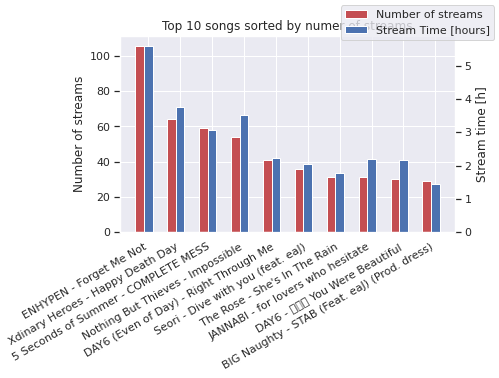

In [ ]:
spotistat.top10tracks(df4)

Top Artists
              artistName  noStreams  streamTimeMs  streamTimeHr
4    5 Seconds of Summer         88      16677972      4.632770
261        One Direction         82      15792714      4.386865
110              ENHYPEN         57      10432393      2.897887
317                 SUHO         52      10388715      2.885754
165              JANNABI         52      10327292      2.868692
201          LE SSERAFIM         52       9134099      2.537250
454                keshi         39       6600812      1.833559
259          ONE OK ROCK         32       7221616      2.006004
159                  IVE         32       5485682      1.523801
93                  DAY6         31       2393523      0.664867


,artistName,noStreams,streamTimeMs,streamTimeHr
4,5 Seconds of Summer,88,16677972,4.632770
261,One Direction,82,15792714,4.386865
110,ENHYPEN,57,10432393,2.897887
317,SUHO,52,10388715,2.885754
165,JANNABI,52,10327292,2.868692
201,LE SSERAFIM,52,9134099,2.537250
454,keshi,39,6600812,1.833559
259,ONE OK ROCK,32,7221616,2.006004
159,IVE,32,5485682,1.523801
93,DAY6,31,2393523,0.664867


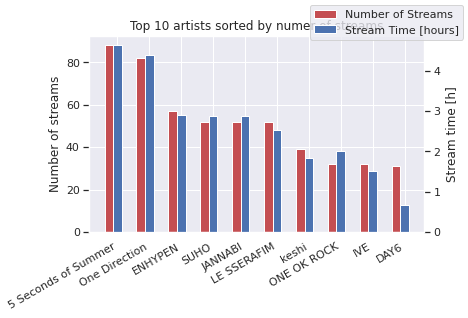

In [ ]:
spotistat.top10artists(df5)

Top Tracks
              trackName              artistName  noStreams  streamTimeMs  \
66            As It Was            Harry Styles         29       4878636   
137           Car Crash                     eaJ         27       5042341   
28   A Man Without Love   Engelbert Humperdinck         24       3730022   
285           Grey Suit                    SUHO         21       4240942   
428           LOVE DIVE                     IVE         20       3071803   
709         Sour Grapes             LE SSERAFIM         17       3362192   
757        Take My Hand     5 Seconds of Summer         17       3481737   
250       Forget Me Not                 ENHYPEN         16       3485434   
415      Kind of a Time      Cabela and Schmitt         14       3460124   
862       What About Me  The Tano Jones Revelry         13       2413800   

     streamTimeHr                                    fullName  
66       1.355177                    Harry Styles - As It Was  
137      1.400650       

,trackName,artistName,noStreams,streamTimeMs,streamTimeHr,fullName
66,As It Was,Harry Styles,29,4878636,1.355177,Harry Styles - As It Was
137,Car Crash,eaJ,27,5042341,1.400650,eaJ - Car Crash
28,A Man Without Love,Engelbert Humperdinck,24,3730022,1.036117,Engelbert Humperdinck - A Man Without Love
285,Grey Suit,SUHO,21,4240942,1.178039,SUHO - Grey Suit
428,LOVE DIVE,IVE,20,3071803,0.853279,IVE - LOVE DIVE
709,Sour Grapes,LE SSERAFIM,17,3362192,0.933942,LE SSERAFIM - Sour Grapes
757,Take My Hand,5 Seconds of Summer,17,3481737,0.967149,5 Seconds of Summer - Take My Hand
250,Forget Me Not,ENHYPEN,16,3485434,0.968176,ENHYPEN - Forget Me Not
415,Kind of a Time,Cabela and Schmitt,14,3460124,0.961146,Cabela and Schmitt - Kind of a Time
862,What About Me,The Tano Jones Revelry,13,2413800,0.670500,The Tano Jones Revelry - What About Me


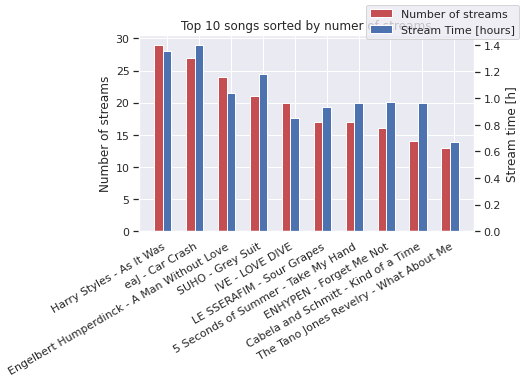

In [ ]:
spotistat.top10tracks(df5)

In [ ]:
spotistat.top10artists_history(df)

TypeError: ignored

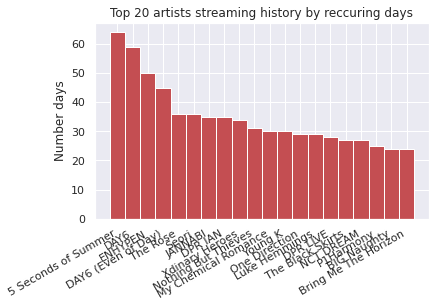

In [ ]:
spotistat.top10artists_most_days(df)

In [ ]:
spotistat.main(df)

FileNotFoundError: ignored

## Exploring ENHYPEN Streams

## Coba Coba

In [ ]:
#convert string datetime to datetime format
df['endTime'] = pd.to_datetime(df['endTime'])
df.groupby(df['endTime'].dt.strftime('%B'))['msPlayed'].sum()

# change datetime format to only date
df['date'] = pd.to_datetime(df['endTime'].dt.strftime("%Y-%m-%d"))

# order by months
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
month_types = pd.Categorical(df['months'], categories=months, ordered=True)
df['month'] = df['month'].astype(month_types)

# group by day names
df_month_sum = df.groupby('month', as_index=True) \
        .agg({'endTime':'sum', 'msPlayed':'sum'}) \
        .rename(columns={'endTime':'noStreams'})


df_month_sum['minsPlayed'] = df_month_sum['msPlayed']/(1000*60)
print(df_month_sum)

KeyError: ignored

In [ ]:
filterByArtist('ENHYPEN')

,endTime,artistName,trackName,msPlayed,date
1762,2021-05-23 09:29:00,ENHYPEN,Drunk-Dazed,50967,2021-05-23
4349,2021-06-03 18:06:00,ENHYPEN,Drunk-Dazed,193260,2021-06-03
4383,2021-06-03 20:00:00,ENHYPEN,FEVER,172106,2021-06-03
5701,2021-06-10 10:22:00,ENHYPEN,Drunk-Dazed,193260,2021-06-10
6539,2021-06-14 13:07:00,ENHYPEN,Drunk-Dazed,193260,2021-06-14
...,...,...,...,...,...
51558,2022-05-13 09:30:00,ENHYPEN,Tamed-Dashed - Japanese Ver.,192489,2022-05-13
51594,2022-05-13 16:41:00,ENHYPEN,"Attention, please!",167594,2022-05-13
51601,2022-05-13 17:02:00,ENHYPEN,Let Me In (20 CUBE),189858,2022-05-13
51608,2022-05-13 17:25:00,ENHYPEN,Flicker,144370,2022-05-13


In [ ]:
# enhypen recent played
en = df5[['artistName', 'trackName']]
en = en[en['artistName'] == 'ENHYPEN']
en.head()

,artistName,trackName
164,ENHYPEN,Forget Me Not
307,ENHYPEN,Polaroid Love
313,ENHYPEN,Blessed-Cursed
358,ENHYPEN,Polaroid Love
364,ENHYPEN,Blessed-Cursed


In [ ]:
# Forget Me Not
fmn5 = df5[['artistName', 'trackName']]
fmn5 = fmn5[fmn5['trackName'] == 'Forget Me Not']
fmn5.count()

artistName    16
trackName     16
dtype: int64

In [ ]:
df5[df5['trackName'] == 'Forget Me Not'].count()

endTime       16
artistName    16
trackName     16
msPlayed      16
dtype: int64

In [ ]:
fmn4 = df4[['artistName', 'trackName']]
fmn4 = fmn4[fmn4['trackName'] == 'Forget Me Not']
fmn4.count()

artistName    106
trackName     106
dtype: int64

In [ ]:
fmn3 = df3[['artistName', 'trackName']]
fmn3 = fmn3[fmn3['trackName'] == 'Forget Me Not']
fmn3.count()

NameError: ignored

In [ ]:
noStreams =  df5['endTime'].count()
noStreams

1696

In [ ]:
# Length Streams per  Month (in hours)
df['endTime'] = pd.to_datetime(df['endTime'])
lengthStreams = df.groupby(df['endTime'].dt.strftime('%B'))['msPlayed'].sum().sort_values()
lenghthStreams = lengthStreams/(1000*60*60)
lenghthStreams

endTime
April         74.488485
February      98.283190
January      103.515016
March        180.520343
December     234.661635
May          237.227210
November     240.122874
October      256.547724
September    326.668728
August       360.965571
June         376.940641
July         445.389186
Name: msPlayed, dtype: float64